# import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error

# import dataset

In [2]:
dataset = pd.read_csv('California_Houses.csv')
features = dataset.iloc[: , 1:]
depending_v = dataset.iloc[: , :1]
print(features)
print("*"*80)
print(depending_v)

       Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  Population  \
0             8.3252          41        880           129         322   
1             8.3014          21       7099          1106        2401   
2             7.2574          52       1467           190         496   
3             5.6431          52       1274           235         558   
4             3.8462          52       1627           280         565   
...              ...         ...        ...           ...         ...   
20635         1.5603          25       1665           374         845   
20636         2.5568          18        697           150         356   
20637         1.7000          17       2254           485        1007   
20638         1.8672          18       1860           409         741   
20639         2.3886          16       2785           616        1387   

       Households  Latitude  Longitude  Distance_to_coast  Distance_to_LA  \
0             126     37.88    -122.23        

# Visualize Data

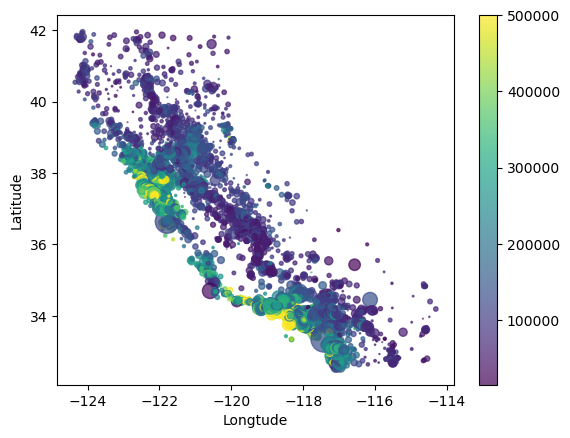

In [3]:
plt.scatter(x = dataset['Longitude'],y=dataset['Latitude'],alpha=0.7,s=dataset['Population']/100,c=dataset['Median_House_Value'],cmap= plt.get_cmap('viridis'))#population is radius,value is color 
plt.xlabel("Longtude")
plt.ylabel("Latitude")
plt.colorbar()
plt.show()

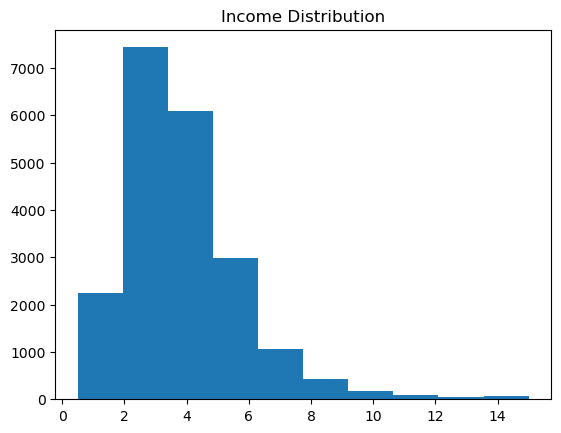

In [4]:
plt.hist(dataset['Median_Income'])
plt.title("Income Distribution")
plt.show()

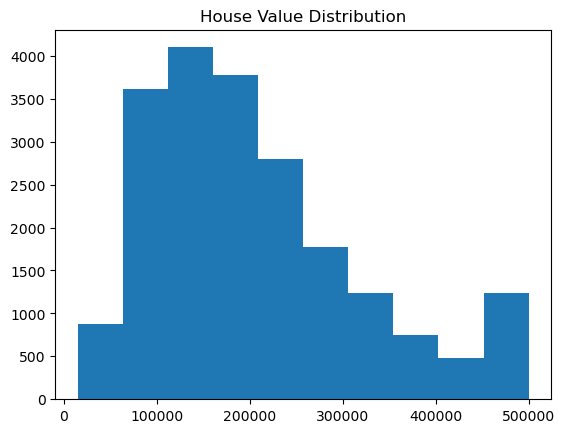

In [5]:
plt.hist(dataset['Median_House_Value'])
plt.title("House Value Distribution")
plt.show()

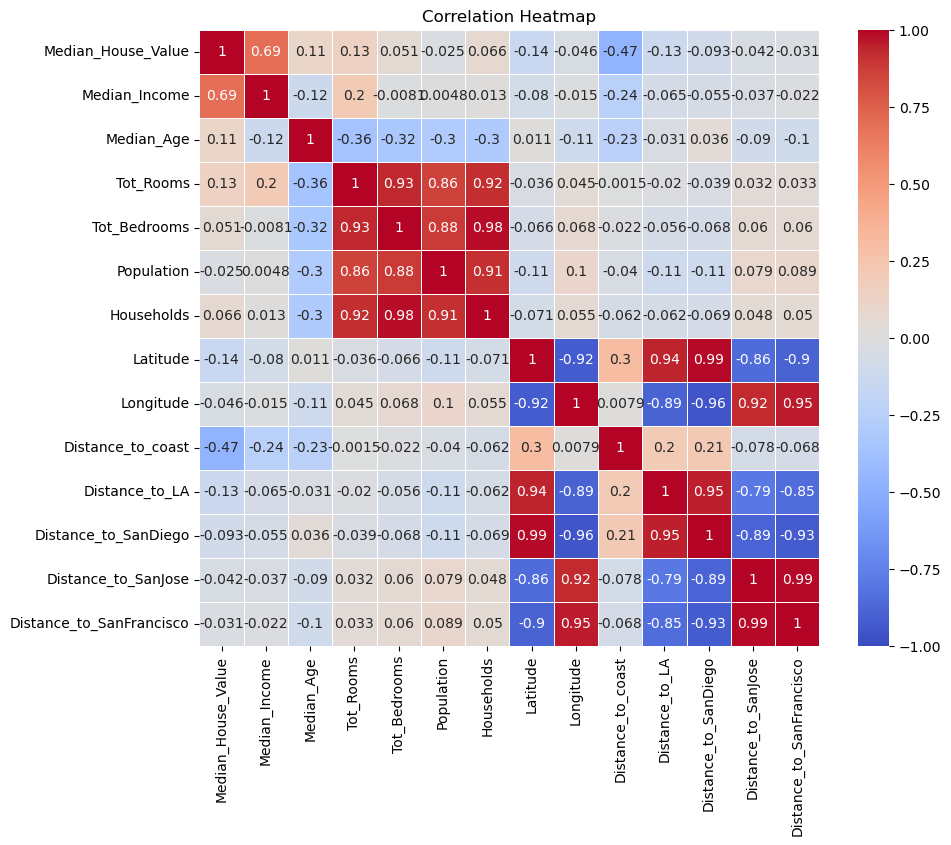

In [6]:
import seaborn as sns
correlation_matrix = dataset.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)

plt.title("Correlation Heatmap")

plt.show()

# Handling missing data

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=  np.nan ,strategy='mean')
imputer.fit(features.iloc[:,:])
features.iloc[: ,:] = imputer.transform(features.iloc[: ,:])
print(features)

       Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  Population  \
0             8.3252          41        880           129         322   
1             8.3014          21       7099          1106        2401   
2             7.2574          52       1467           190         496   
3             5.6431          52       1274           235         558   
4             3.8462          52       1627           280         565   
...              ...         ...        ...           ...         ...   
20635         1.5603          25       1665           374         845   
20636         2.5568          18        697           150         356   
20637         1.7000          17       2254           485        1007   
20638         1.8672          18       1860           409         741   
20639         2.3886          16       2785           616        1387   

       Households  Latitude  Longitude  Distance_to_coast  Distance_to_LA  \
0             126     37.88    -122.23        

# Feature scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = sc.fit_transform(features)
# Print column names of the dataset
print(features)

[[ 2.34476576  0.98214266 -0.8048191  ...  1.16566824 -1.29754558
  -1.46107412]
 [ 2.33223796 -0.60701891  2.0458901  ...  1.1578418  -1.30851803
  -1.46255188]
 [ 1.7826994   1.85618152 -0.53574589 ...  1.15883974 -1.30935903
  -1.47082449]
 ...
 [-1.14259331 -0.92485123 -0.17499526 ...  1.49462431 -0.50204022
  -0.69803768]
 [-1.05458292 -0.84539315 -0.35559977 ...  1.50835264 -0.51115099
  -0.71472888]
 [-0.78012947 -1.00430931  0.06840827 ...  1.47689622 -0.5337677
  -0.72452362]]


# Split dataset randomly

In [9]:

from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(features, depending_v, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)


# Linear Regression

In [10]:
linear_model = LinearRegression()
lr = linear_model.fit(X_train, y_train)


# Predictions
y_traind_pred_linear = linear_model.predict(X_train)
y_val_pred_linear = linear_model.predict(X_val)

#Calculate metrics
linear_mae = mean_absolute_error(y_val, y_val_pred_linear)
linear_mse = mean_squared_error(y_val, y_val_pred_linear)

# Print
print(f'Linear Regression MAE={linear_mae:.2f}')
print(f'Linear Regression MSE={linear_mse:.2f}')
print(f"R2 train  = {lr.score(X_train,y_train)}")#R2 score 
print(f"R2 Validation  = {lr.score(X_val,y_val)}")#R2 score

Linear Regression MAE=50790.06
Linear Regression MSE=4907211997.37
R2 train  = 0.6469080431646521
R2 Validation  = 0.6233241175944966


# Lasso

In [25]:
# List for different learning rates
alphas = [0.005,0.01,0.05, 0.1, 1, 10, 100]

# Loop over different learning rates
for LR in alphas:
    # Train the model on current alpha
    lasso_model = Lasso(alpha = LR)
    lr = lasso_model.fit(X_train, y_train)
    
    # Prediction
    y_train_pred_lasso = lasso_model.predict(X_train)
    y_val_pred_lasso = lasso_model.predict(X_val)
    
    # Calculate metrics
    lasso_mae = mean_absolute_error(y_val, y_val_pred_lasso)
    lasso_mse = mean_squared_error(y_val, y_val_pred_lasso)
    
    # Print
    print(f'Lasso Regression with alpha={LR}:')
    print(f'  MAE = {lasso_mae:.2f}')
    print(f'  MSE = {lasso_mse:.2f}')
    print(f"R2 train  = {lr.score(X_train,y_train)}")#R2 score 
    print(f"R2 Validation  = {lr.score(X_val,y_val)}")#R2 score 
    print('-' * 30)

C:\Users\abdel\anaconda3\envs\torch-2024\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.408e+13, tolerance: 1.936e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\abdel\anaconda3\envs\torch-2024\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.399e+13, tolerance: 1.936e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\abdel\anaconda3\envs\torch-2024\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

Lasso Regression with alpha=0.005:
  MAE = 50790.11
  MSE = 4907208093.09
R2 train  = 0.6469078639215751
R2 Validation  = 0.6233244172862968
------------------------------
Lasso Regression with alpha=0.01:
  MAE = 50790.12
  MSE = 4907208186.23
R2 train  = 0.6469078627217622
R2 Validation  = 0.6233244101365578
------------------------------
Lasso Regression with alpha=0.05:
  MAE = 50790.15
  MSE = 4907208934.07
R2 train  = 0.6469078529301964
R2 Validation  = 0.6233243527326693
------------------------------


C:\Users\abdel\anaconda3\envs\torch-2024\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.244e+13, tolerance: 1.936e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\abdel\anaconda3\envs\torch-2024\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.135e+13, tolerance: 1.936e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\abdel\anaconda3\envs\torch-2024\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

Lasso Regression with alpha=0.1:
  MAE = 50790.18
  MSE = 4907209875.58
R2 train  = 0.6469078402080843
R2 Validation  = 0.6233242804628666
------------------------------
Lasso Regression with alpha=1:
  MAE = 50790.83
  MSE = 4907228097.33
R2 train  = 0.6469075195056713
R2 Validation  = 0.6233228817674693
------------------------------
Lasso Regression with alpha=10:
  MAE = 50797.50
  MSE = 4907543143.09
R2 train  = 0.6468947559180014
R2 Validation  = 0.6232986989650667
------------------------------
Lasso Regression with alpha=100:
  MAE = 50976.07
  MSE = 4923965930.53
R2 train  = 0.6458121848949574
R2 Validation  = 0.6220380915253566
------------------------------


C:\Users\abdel\anaconda3\envs\torch-2024\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.120e+10, tolerance: 1.936e+10
  model = cd_fast.enet_coordinate_descent(


# Ridge Regression

In [24]:
# List for different learning rates
alphas = [0.005,0.01,0.05, 0.1, 1, 10, 100]

# Loop over different learning rates
for LR in alphas:
    # Train the model on current alpha
    ridge_model = Ridge(alpha = LR)
    lr = ridge_model.fit(X_train, y_train)
    
    # Prediction
    y_train_pred_ridge = ridge_model.predict(X_train)
    y_test_pred_ridge = ridge_model.predict(X_test)
    
    # Calculate metrics
    ridge_mae = mean_absolute_error(y_test, y_test_pred_ridge)
    ridge_mse = mean_squared_error(y_test, y_test_pred_ridge)
    
    # Print
    print(f'Ridge Regression with alpha={LR}:')
    print(f'  MAE = {ridge_mae:.2f}')
    print(f'  MSE = {ridge_mse:.2f}')
    print(f"R2 train  = {lr.score(X_train,y_train)}")#R2 score 
    print(f"R2 Validation  = {lr.score(X_val,y_val)}")#R2 score
    print('-' * 30)

Ridge Regression with alpha=0.005:
  MAE = 48782.04
  MSE = 4400950872.91
R2 train  = 0.6469080431076897
R2 Validation  = 0.6233241032244756
------------------------------
Ridge Regression with alpha=0.01:
  MAE = 48782.05
  MSE = 4400948597.34
R2 train  = 0.6469080429368658
R2 Validation  = 0.6233240887264477
------------------------------
Ridge Regression with alpha=0.05:
  MAE = 48782.14
  MSE = 4400930469.29
R2 train  = 0.6469080374827213
R2 Validation  = 0.623323968147329
------------------------------
Ridge Regression with alpha=0.1:
  MAE = 48782.25
  MSE = 4400907999.72
R2 train  = 0.6469080205003196
R2 Validation  = 0.6233238059993311
------------------------------
Ridge Regression with alpha=1:
  MAE = 48784.32
  MSE = 4400538182.34
R2 train  = 0.6469058861887672
R2 Validation  = 0.6233188363537969
------------------------------
Ridge Regression with alpha=10:
  MAE = 48818.48
  MSE = 4399297220.15
R2 train  = 0.6467674001304082
R2 Validation  = 0.6231403938020457
-----------